# 0. Import


In [ ]:
from os import listdir
from matplotlib import image
import numpy as np
from google.colab import drive
from PIL import Image
import zipfile
import re
import matplotlib.pyplot as plt
from keras import backend as K

import tensorflow as tf
from sklearn.preprocessing import normalize
from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout, Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import Model
from keras.layers.merge import concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Read data


In [ ]:
PATH_ZIP = '/content/drive/My Drive/PROJET F4 ZZ3 HAMZA/Data_radar.zip'
PATH_X = '/content/targetdir/X/'
PATH_Y = '/content/targetdir/Y/'

In [ ]:
with zipfile.ZipFile(PATH_ZIP,"r") as zip_ref:
    zip_ref.extractall("targetdir")

In [ ]:
def get_image(path):
    l = []
    for i, filename in enumerate(listdir(path)):
        # store loaded image
        l.append(filename)
    l.sort(key=lambda f: int(re.sub('\D', '', f)))
    loaded_images = []
    print(l)
    for i, item in enumerate(l):
        loaded_images.append(np.load(path+item).reshape(1025,1025,1))
    return np.array(loaded_images)

In [ ]:
X = get_image(PATH_X)
Y = get_image(PATH_Y)
X.shape

['scan_0.npy', 'scan_1.npy', 'scan_2.npy', 'scan_3.npy', 'scan_4.npy', 'scan_5.npy', 'scan_6.npy', 'scan_7.npy', 'scan_8.npy', 'scan_9.npy', 'scan_10.npy', 'scan_11.npy', 'scan_12.npy', 'scan_13.npy', 'scan_14.npy', 'scan_15.npy', 'scan_16.npy', 'scan_17.npy', 'scan_18.npy', 'scan_19.npy', 'scan_20.npy', 'scan_21.npy', 'scan_22.npy', 'scan_23.npy', 'scan_24.npy', 'scan_25.npy', 'scan_26.npy', 'scan_27.npy', 'scan_28.npy', 'scan_29.npy', 'scan_30.npy', 'scan_31.npy', 'scan_32.npy', 'scan_33.npy', 'scan_34.npy', 'scan_35.npy', 'scan_36.npy', 'scan_37.npy', 'scan_38.npy', 'scan_39.npy', 'scan_40.npy', 'scan_41.npy', 'scan_42.npy', 'scan_43.npy', 'scan_44.npy', 'scan_45.npy', 'scan_46.npy', 'scan_47.npy', 'scan_48.npy', 'scan_49.npy', 'scan_50.npy', 'scan_51.npy', 'scan_52.npy', 'scan_53.npy', 'scan_54.npy', 'scan_55.npy', 'scan_56.npy', 'scan_57.npy', 'scan_58.npy', 'scan_59.npy', 'scan_60.npy', 'scan_61.npy', 'scan_62.npy', 'scan_63.npy', 'scan_64.npy', 'scan_65.npy', 'scan_66.npy', 'sca

(1556, 1025, 1025, 1)

In [ ]:
Y.shape

(1556, 1025, 1025, 1)

In [ ]:
"""X = X[:, 360:-361, 360:-361]
Y = Y[:, 360:-361, 360:-361]
X.shape"""

'X = X[:, 360:-361, 360:-361]\nY = Y[:, 360:-361, 360:-361]\nX.shape'

In [ ]:
"""plt.figure()
f, axarr = plt.subplots(1,5, figsize=(15, 15))

for i in range(5):
    axarr[i].imshow(Y[189+i].reshape(304,304))"""

'plt.figure()\nf, axarr = plt.subplots(1,5, figsize=(15, 15))\n\nfor i in range(5):\n    axarr[i].imshow(Y[189+i].reshape(304,304))'

In [ ]:
"""plt.figure()
f, axarr = plt.subplots(1,5, figsize=(15, 15))

for i in range(5):
        axarr[i].imshow(X[189+i].reshape(304,304))"""

'plt.figure()\nf, axarr = plt.subplots(1,5, figsize=(15, 15))\n\nfor i in range(5):\n        axarr[i].imshow(X[189+i].reshape(304,304))'

In [ ]:
#original data 160x80

X_crop = X[:, 360:-505, 465:-480]
Y_crop = Y[:, 360:-505, 465:-480]

In [ ]:
#original data 368x80
"""X_crop = X[:, 152:-505, 465:-480]
Y_crop = Y[:, 152:-505, 465:-480]"""

In [ ]:
X_crop.shape

(1556, 160, 80, 1)

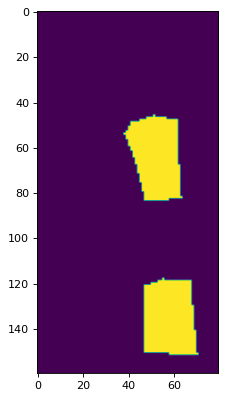

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

#subplot(r,c) provide the no. of rows and columns
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
#plt.imshow(l_radar_annotation[230])
plt.imshow(Y_crop[528].reshape(160, 80))

In [ ]:
X_crop = np.float64(X_crop)

In [ ]:
for i in range(len(X_crop)):
    X_crop[i] = (X_crop[i] - np.min(X_crop[i]))/(np.max(X_crop[i])-np.min(X_crop[i]))

<Figure size 432x288 with 0 Axes>

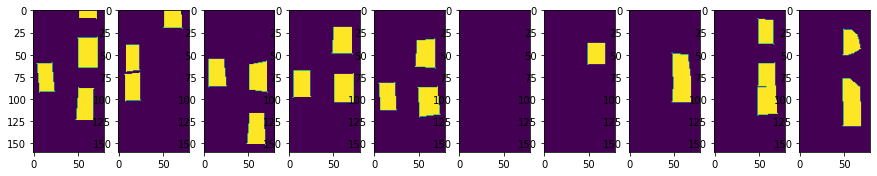

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,10, figsize=(15, 15))

for i in range(10):
    axarr[i].imshow(Y_crop[189+i].reshape(160,80))

<Figure size 432x288 with 0 Axes>

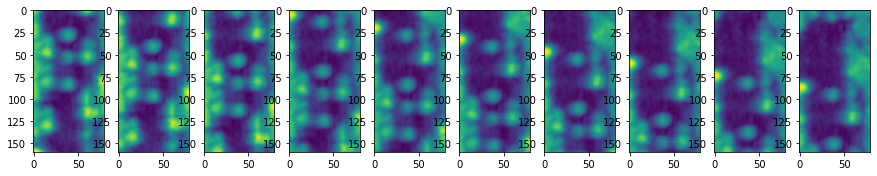

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,10, figsize=(15, 15))

for i in range(10):
        axarr[i].imshow(X_crop[189+i].reshape(160,80))

In [ ]:
len(Y_crop)

1556

In [ ]:
res = 0
for i in range(len(Y_crop)):
    if(1 in Y_crop[i]):
        res += 1
res/len(Y)

0.653598971722365

# 2. UNet + metrics

In [ ]:
# https://www.kaggle.com/xhlulu/severstal-simple-keras-u-net-boilerplate

# COMPETITION METRIC
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

In [ ]:
#https://www.kaggle.com/dingli/keras-u-net-for-nuclei-segmentation
inputs = Input((160,80,1))
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 80, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 160, 80, 16)  160         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 160, 80, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 160, 80, 16)  2320        ['dropout[0][0]']            

# 3. Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crop, Y_crop, test_size=0.1)

In [ ]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
datagen = ImageDataGenerator(rotation_range=5)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef, iou_coef])
history = model.fit(datagen.flow(X_train,y_train, batch_size=10), epochs=60, batch_size=10, validation_data=(X_test,y_test), callbacks=[lr_reduction])

Epoch 1/60
140/140 [==============================] - 27s 82ms/step - loss: 0.1866 - dice_coef: 0.0856 - iou_coef: 0.0335 - val_loss: 0.1643 - val_dice_coef: 0.1156 - val_iou_coef: 0.0460 - lr: 0.0010
Epoch 2/60
140/140 [==============================] - 10s 72ms/step - loss: 0.1468 - dice_coef: 0.1497 - iou_coef: 0.0574 - val_loss: 0.1366 - val_dice_coef: 0.1945 - val_iou_coef: 0.0755 - lr: 0.0010
Epoch 3/60
140/140 [==============================] - 10s 71ms/step - loss: 0.1323 - dice_coef: 0.2213 - iou_coef: 0.0833 - val_loss: 0.1197 - val_dice_coef: 0.3192 - val_iou_coef: 0.1332 - lr: 0.0010
Epoch 4/60
140/140 [==============================] - 10s 72ms/step - loss: 0.1102 - dice_coef: 0.3213 - iou_coef: 0.1245 - val_loss: 0.1304 - val_dice_coef: 0.3757 - val_iou_coef: 0.1559 - lr: 0.0010
Epoch 5/60
140/140 [==============================] - 10s 72ms/step - loss: 0.1079 - dice_coef: 0.3390 - iou_coef: 0.1318 - val_loss: 0.1010 - val_dice_coef: 0.4430 - val_iou_coef: 0.2068 - lr: 0.

In [ ]:
model.save('/content/drive/My Drive/PROJET F4 ZZ3 HAMZA/UNET_radar_input_160x80_60_epochs_data_augmentation.h5')

In [ ]:
Y_pred = load_model('/content/drive/My Drive/PROJET F4 ZZ3 HAMZA/UNET_radar_input_160x80_60_epochs_data_augmentation.h5', custom_objects={"dice_coef": dice_coef, "iou_coef": iou_coef }).predict(X_test)

<Figure size 432x288 with 0 Axes>

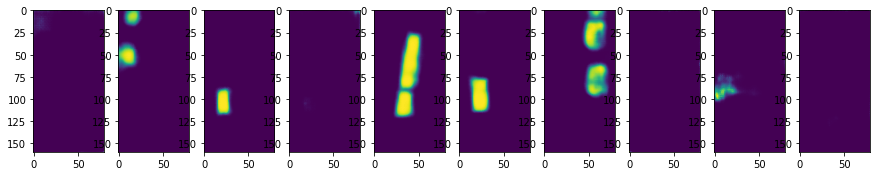

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,10, figsize=(15, 15))

for i in range(10):
        axarr[i].imshow(Y_pred[i+10].reshape(160,80))

<Figure size 432x288 with 0 Axes>

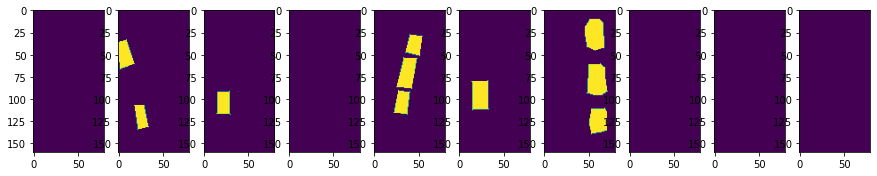

In [ ]:
plt.figure()
f, axarr = plt.subplots(1,10, figsize=(15, 15))

for i in range(10):
        axarr[i].imshow(y_test[i+10].reshape(160,80))